# Lab 6 - Data Visualization with Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [17]:
week_three = pd.read_csv('nfloffenseweek3.csv')
week_four = pd.read_csv('nfloffenseweek4.csv')
week_five = pd.read_csv('nfloffenseweek5.csv')
week_six = pd.read_csv('nfloffenseweek6.csv')
week_six = pd.read_csv('nfloffenseweek6.csv')
week_seven = pd.read_csv('nfloffenseweek7.csv')

week_three['week'] = 3
week_four['week'] = 4
week_five['week'] = 5
week_six['week'] = 6
week_seven['week'] = 7
df = pd.concat((file for file in [week_three, week_four, week_five, week_six, week_seven]))
df.reset_index(inplace=True)
df = pd.merge(pd.read_csv('nfl_teams.csv'), df, left_on='Name', right_on='team')
df = pd.merge(pd.read_csv('teams_colors_logos.csv'), df, left_on='team_name', right_on='Name')
df.drop(['index', 'team_abbr', 'team_name', 'team_conf', 'team_division', 'ID'],axis=1, inplace=True)
df.columns


,team_id,team_nick,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,...,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week
10,325,Ravens,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,2,5.6,18,8,44,5,42.9,8.6,35.63,3
11,325,Ravens,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,3,5.4,31,17,114,7,42.2,11.1,32.97,4
12,325,Ravens,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,3,5.4,44,23,162,9,43.6,10.9,36.86,5
13,325,Ravens,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,4,5.9,54,33,236,9,43.8,12.5,42.86,6
14,325,Ravens,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,6,5.4,65,36,289,10,44.6,12.2,44.44,7
80,2510,Rams,#003594,#FFD100,#001532,#af925d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/lar.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,3,3.4,14,13,126,4,37.9,24.1,3.48,3
81,2510,Rams,#003594,#FFD100,#001532,#af925d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/lar.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,3,3.3,17,14,131,6,35.9,23.1,-8.08,4
82,2510,Rams,#003594,#FFD100,#001532,#af925d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/lar.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,3,3.2,19,17,156,8,31.4,23.5,-19.19,5
83,2510,Rams,#003594,#FFD100,#001532,#af925d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/lar.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,5,3.4,24,24,205,9,32.3,21.0,-15.68,6
84,2510,Rams,#003594,#FFD100,#001532,#af925d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/lar.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,...,5,3.4,24,24,205,9,32.3,21.0,-15.68,7


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

Text(0.5, 0, '')

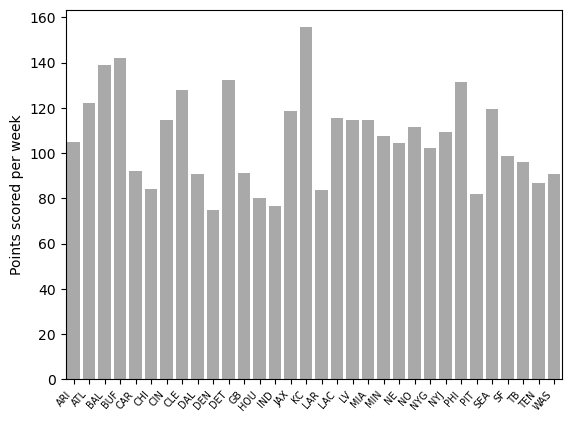

In [7]:
sns.barplot(x = df.Abbreviation, y = df.points_scored, color='darkgrey', errorbar=None)
plt.xticks(rotation=48, horizontalalignment = 'right', fontsize = 'x-small')
plt.ylabel('Points scored per week')
plt.xlabel('')


3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

Text(0.5, 0, '')

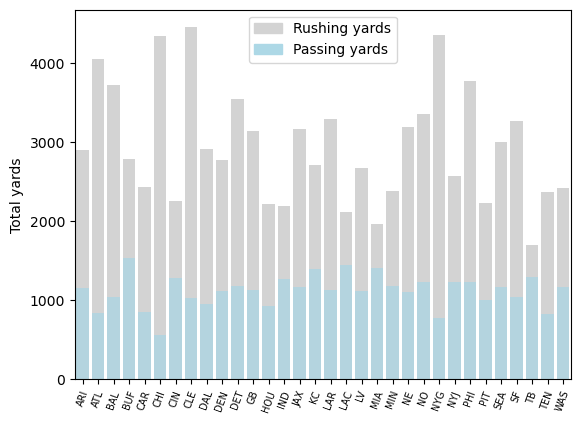

In [6]:
sns.barplot(df, x='Abbreviation', y='rushing_yards', color = 'lightgrey', label = 'rushing', estimator=np.sum, errorbar=None)
sns.barplot(df, x='Abbreviation', y='passing_yards', color = 'lightblue', label = 'passing', errorbar=None)
top = mp.Patch(color = 'lightgrey', label = 'Rushing yards')
bottom = mp.Patch(color = 'lightblue', label= 'Passing yards')
plt.legend(handles = [top,bottom])
plt.xticks(rotation=70, fontsize = 'x-small')
plt.ylabel('Total yards')
plt.xlabel('')

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

Text(0, 0.5, 'Total yards')

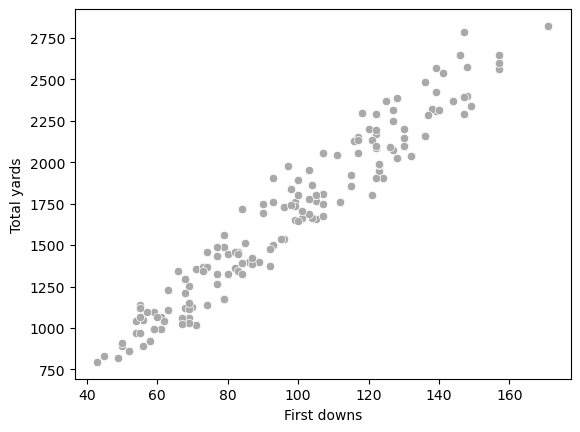

In [10]:
sns.scatterplot(df, x='1st_downs', y='total_yards', color='darkgrey')
plt.xlabel('First downs')
plt.ylabel('Total yards')

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0, 0.5, 'Penalty Yards')

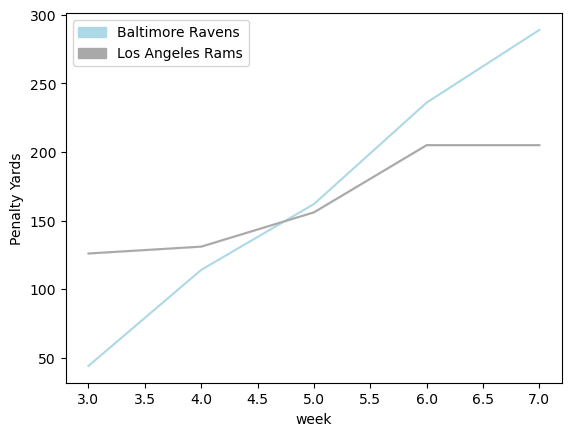

In [22]:
sns.lineplot(df[(df.Name=='Baltimore Ravens')],x='week', y='penalty_yards', color='lightblue')
sns.lineplot(df[(df.Name=='Los Angeles Rams')],x='week', y='penalty_yards', color='darkgrey')
top = mp.Patch(color = 'lightblue', label = 'Baltimore Ravens')
bottom = mp.Patch(color = 'darkgrey', label= 'Los Angeles Rams')
plt.legend(handles = [top,bottom])
plt.ylabel('Penalty Yards')

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)